In [1]:
import yaml
import os
os.chdir('/nfs/pic.es/user/j/jharriso/IFAE_ML')
from binning.utils.data_retriever import get_dataset, get_data_scaling, scale_log_prob, get_data_from_feather

from binning.algs.model_independent import run_binning_alg

import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

plt.style.use(hep.style.ATLAS)



In [2]:
read_from_feather = True
feather_path = "/data/at3/common/multilepton/FinalSystProduction/feather/Regions"
    

trainrun_file = 'evaluate/region_settings/nf_NewYields.yaml'
#trainrun_file = 'evaluate/region_settings/nf_Q2.yaml'
#output_folder = 'binning/outputs/modelIndepQ2'
output_folder = 'binning/outputs/ModelIndepOverlapCheck'

In [3]:
with open(trainrun_file, 'r') as f:
        r_config = yaml.safe_load(f)

chosen_regions = [
    #'0Z_0b_0SFOS',
    #'0Z_0b_1SFOS',
    #'0Z_0b_2SFOS',
    #'1Z_0b_1SFOS',
    #'1Z_0b_2SFOS',
    '2Z_0b'
    ]

r_name = '2Z'

In [4]:
# Change get dataset to get the run 3 scores from feathers

region = chosen_regions[0]
apply_conv_veto = True
scale_ad_score = False

if read_from_feather:
    region_file = region+ "_10GeV.ftr"
    dataset = get_data_from_feather(os.path.join(feather_path,region_file), r_config, region,
                                    apply_conv_veto=apply_conv_veto,
                                   scale_ad_score=scale_ad_score)
    region_scores = dataset['all_scores']
else:
    dataset = get_dataset(region, r_config, old_name=True)

    even_dir = os.path.join(r_config['even_base_dir'],r_config['regions'][region]['even_path'])
    odd_dir = os.path.join(r_config['odd_base_dir'],r_config['regions'][region]['odd_path'])
    min_scale, max_scale = get_data_scaling(even_dir, odd_dir)
    region_scores, _,_ = scale_log_prob(dataset['all_scores'], min_prob=min_scale, max_prob=max_scale)

    region_sigs,_,_ = scale_log_prob(dataset['all_sigs'], min_prob=min_scale, max_prob=max_scale)

print("Succesfully got input data for 0b region, sum of weights: ", sum(dataset['all_weights']))
#Repeat for 1b regions
region_1b = region.replace('0b', '1b')

if read_from_feather:
    region_file = region_1b + "_10GeV.ftr"
    dataset_1b = get_data_from_feather(os.path.join(feather_path,region_file), r_config, region_1b,
                                      apply_conv_veto=apply_conv_veto,
                                      scale_ad_score=scale_ad_score)

Reading feather file...
Making variables...


ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0
sh: line 1: root-config: command not found
Error in <TUnixSystem::GetFromPipe>: command "root-config --has-dataframe" returned 32512


Welcome to JupyROOT 6.28/04
Done function find_Z_pairs_2Z.
Done function calc_4lep_pTll.
Done function calc_m3l.
Done function make_jets_continuous.
Done function get_MTLepLepMET.
Calculating MC weight...
Selecting samples...
Applying conversion veto to the data...
Length of data before:  1785145
Length of data after:  1640512
StandardScaling input variables...


/data/at3/common/multilepton/miniforge3/envs/ML_env/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/data/at3/common/multilepton/miniforge3/envs/ML_env/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/data/at3/common/multilepton/miniforge3/envs/ML_env/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Tryin

Loading models...
Using RealNVP normalising flow.
Using RealNVP normalising flow.
Reading min/max scaling...
Evaluating even/odd models...
Ignoring scaling...
Succesfully got input data for 0b region, sum of weights:  2130.3186985868933
Reading feather file...
Making variables...
Done function find_Z_pairs_2Z.
Done function calc_4lep_pTll.
Done function calc_m3l.
Done function make_jets_continuous.
Done function get_MTLepLepMET.
Calculating MC weight...
Selecting samples...
Applying conversion veto to the data...
Length of data before:  84928
Length of data after:  77820
StandardScaling input variables...


/data/at3/common/multilepton/miniforge3/envs/ML_env/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/data/at3/common/multilepton/miniforge3/envs/ML_env/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/data/at3/common/multilepton/miniforge3/envs/ML_env/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Tryin

Loading models...
Using RealNVP normalising flow.
Increasing size of input dimension by 1, due to odd input numbers.
Using RealNVP normalising flow.
Increasing size of input dimension by 1, due to odd input numbers.
Reading min/max scaling...
Evaluating even/odd models...
Ignoring scaling...


In [5]:
dataset

{'all_scores': array([ -6.4853735 ,   0.76169014, -14.229636  , ..., -17.170422  ,
        -19.80553   , -20.244097  ], dtype=float32),
 'all_weights': array([0.08650405, 0.11517744, 0.12819999, ..., 0.02837765, 0.00580547,
        0.0220245 ]),
 'all_inds': array([   4164,    4165,    4166, ..., 1791234, 1791235, 1791236])}

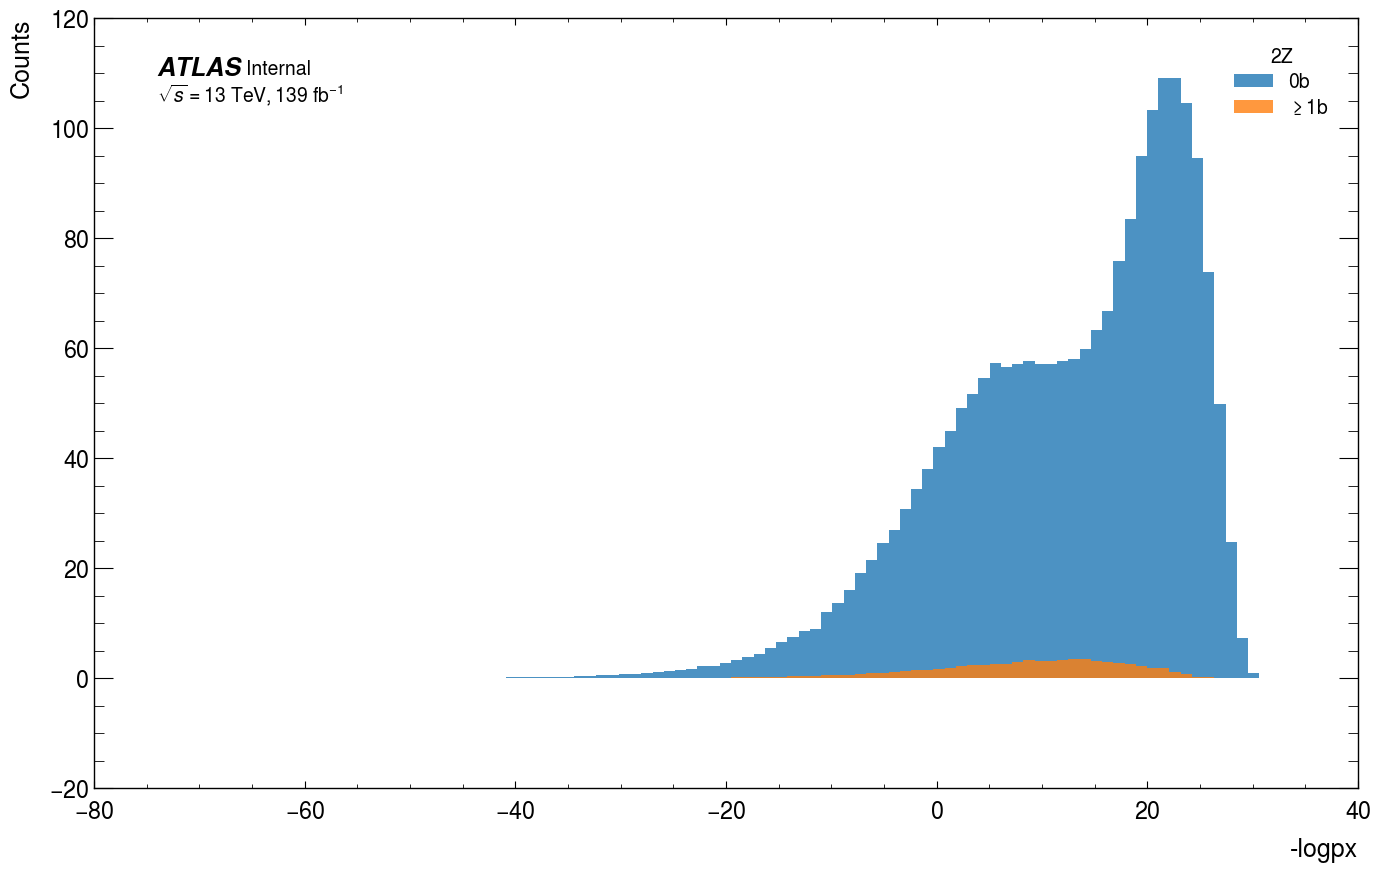

In [6]:
min_bin = min(dataset['all_scores'].min(),dataset_1b['all_scores'].min())
max_bin = max(dataset['all_scores'].max(), dataset_1b['all_scores'].max())

min_bin = -75
num_bins = 100
bins = np.linspace(min_bin,max_bin,num_bins)
alpha=0.8
density=False
figsize=(16,10)
title = r_name

overflow_scores = np.clip(dataset['all_scores'], min_bin,max_bin)
overflow_scores_1b = np.clip(dataset_1b['all_scores'], min_bin,max_bin)
hist = np.histogram(overflow_scores, weights=dataset['all_weights'], bins=bins)

hist2 = np.histogram(overflow_scores_1b, weights=dataset_1b['all_weights'], bins=bins)

fig, ax = plt.subplots(figsize=figsize)
hep.histplot(hist,histtype="fill",
    alpha=alpha,
    density=density,
    label='0b',
    ax=ax)

hep.histplot(hist2,histtype="fill",
    alpha=alpha,
    density=density,
    label=r'$\geq$1b',
    ax=ax)


hep.atlas.label(" Internal", data=True, lumi=139)
ax.legend(title=title)
ax.set_xlabel('-logpx', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.tick_params(axis='x', which='major', pad=8.5)

save_name = False
if save_name:
    #plt.savefig(os.path.join(save_dir, f"{var_choice}.png"))
    #plt.savefig(os.path.join(save_dir, f"{var_choice}.pdf"))
    plt.savefig(save_name+".png")
    plt.savefig(save_name+".pdf")

plt.show()
plt.close()

In [7]:
med_0b = np.median(overflow_scores)
med_0b

8.524901

In [8]:
med_0b

8.524901

In [9]:
med_1b = np.median(overflow_scores_1b)
med_1b

8.625137

In [10]:
delta = med_1b - med_0b

In [11]:
delta

0.10023594

In [12]:
adjusted_1b = dataset_1b['all_scores']-delta

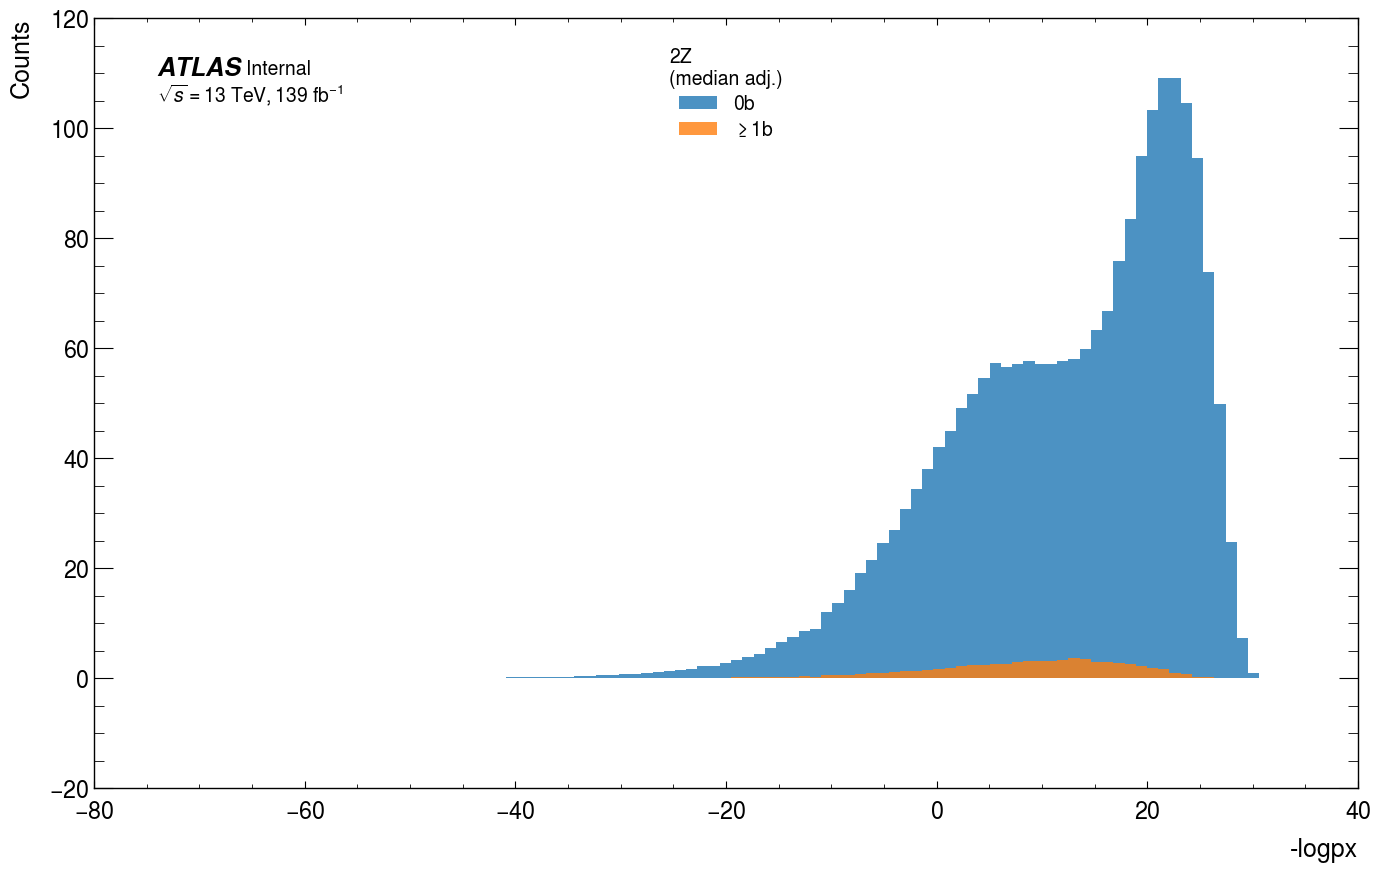

In [13]:
hist = np.histogram(overflow_scores, weights=dataset['all_weights'], bins=bins)

hist2 = np.histogram(adjusted_1b, weights=dataset_1b['all_weights'], bins=bins)

fig, ax = plt.subplots(figsize=figsize)
hep.histplot(hist,histtype="fill",
    alpha=alpha,
    density=density,
    label='0b',
    ax=ax)

hep.histplot(hist2,histtype="fill",
    alpha=alpha,
    density=density,
    label=r'$\geq$1b',
    ax=ax)

title = f"{r_name}\n(median adj.)"
hep.atlas.label(" Internal", data=True, lumi=139)
ax.legend(title=title, loc='upper center')
ax.set_xlabel('-logpx', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.tick_params(axis='x', which='major', pad=8.5)

save_name = False
if save_name:
    #plt.savefig(os.path.join(save_dir, f"{var_choice}.png"))
    #plt.savefig(os.path.join(save_dir, f"{var_choice}.pdf"))
    plt.savefig(save_name+".png")
    plt.savefig(save_name+".pdf")

plt.show()
plt.close()

In [14]:
def scale_log_prob(log_probs, min_prob=None, max_prob=None, use_01=True):
    
        if use_01:
            log_probs = -log_probs
        
        if min_prob is None:
            min_prob = log_probs.min()
            max_prob = log_probs.max()
            min_prob = min_prob
            max_prob = max_prob

        log_probs = (log_probs - min_prob) / (max_prob - min_prob)
        print(f"Scaled loglikelihood using {min_prob} , {max_prob} to mean: {log_probs.mean()}")
        return log_probs, min_prob, max_prob

In [15]:
overflow_scores

array([ -6.4853735 ,   0.76169014, -14.229636  , ..., -17.170422  ,
       -19.80553   , -20.244097  ], dtype=float32)

In [16]:
overflow_scores_1b

array([ 12.875502 ,  -1.42976  , -18.229612 , ...,   3.3836994,
         4.799509 ,  -2.474228 ], dtype=float32)

In [17]:
# Try overall min max

# Try min of one / min of other

# Try median shift and then scale

In [18]:
min_bin = min(dataset['all_scores'].min(),dataset_1b['all_scores'].min())
max_bin = max(dataset['all_scores'].max(), dataset_1b['all_scores'].max())

In [19]:
min_bin

-1116.3114

In [20]:
max_bin

30.623951

In [21]:
min_0b, max_0b= dataset['all_scores'].min(), dataset['all_scores'].max()

min_1b, max_1b= dataset_1b['all_scores'].min(), dataset_1b['all_scores'].max()

In [22]:
max_0b = max(dataset['all_scores'])
min_0b = np.percentile(dataset['all_scores'], 0.01)


In [23]:
max_1b = max(dataset_1b['all_scores'])
min_1b = np.percentile(dataset_1b['all_scores'], 0.01)

In [24]:
# Find the min max together
max_all = max(dataset['all_scores'].max(), dataset_1b['all_scores'].max())
min_all = np.percentile(np.concatenate([dataset['all_scores'],dataset_1b['all_scores']]), 0.01)

In [25]:
# Find the min max together using shifted scores
#max_all = max(dataset['all_scores'].max(), adjusted_1b.max())
#min_all = np.percentile(np.concatenate([dataset['all_scores'],adjusted_1b]), 0.01)

In [30]:
min_choice_0b = -max_0b
max_choice_0b = -min_0b

scaled_0b ,_,_= scale_log_prob(overflow_scores, min_prob=min_choice_0b, max_prob=max_choice_0b)

Scaled loglikelihood using -30.623950958251953 , 92.13024761886597 to mean: 0.1840333193540573


In [31]:
min_choice_1b = -max_1b
max_choice_1b = -min_1b

scaled_1b, _,_ = scale_log_prob(overflow_scores_1b, min_prob=min_choice_1b, max_prob=max_choice_1b)

Scaled loglikelihood using -28.230541229248047 , 59.91314234313965 to mean: 0.23739002645015717


In [32]:
scaled_1b

array([0.17420465, 0.33649945, 0.5270956 , ..., 0.2818902 , 0.2658277 ,
       0.34834906], dtype=float32)

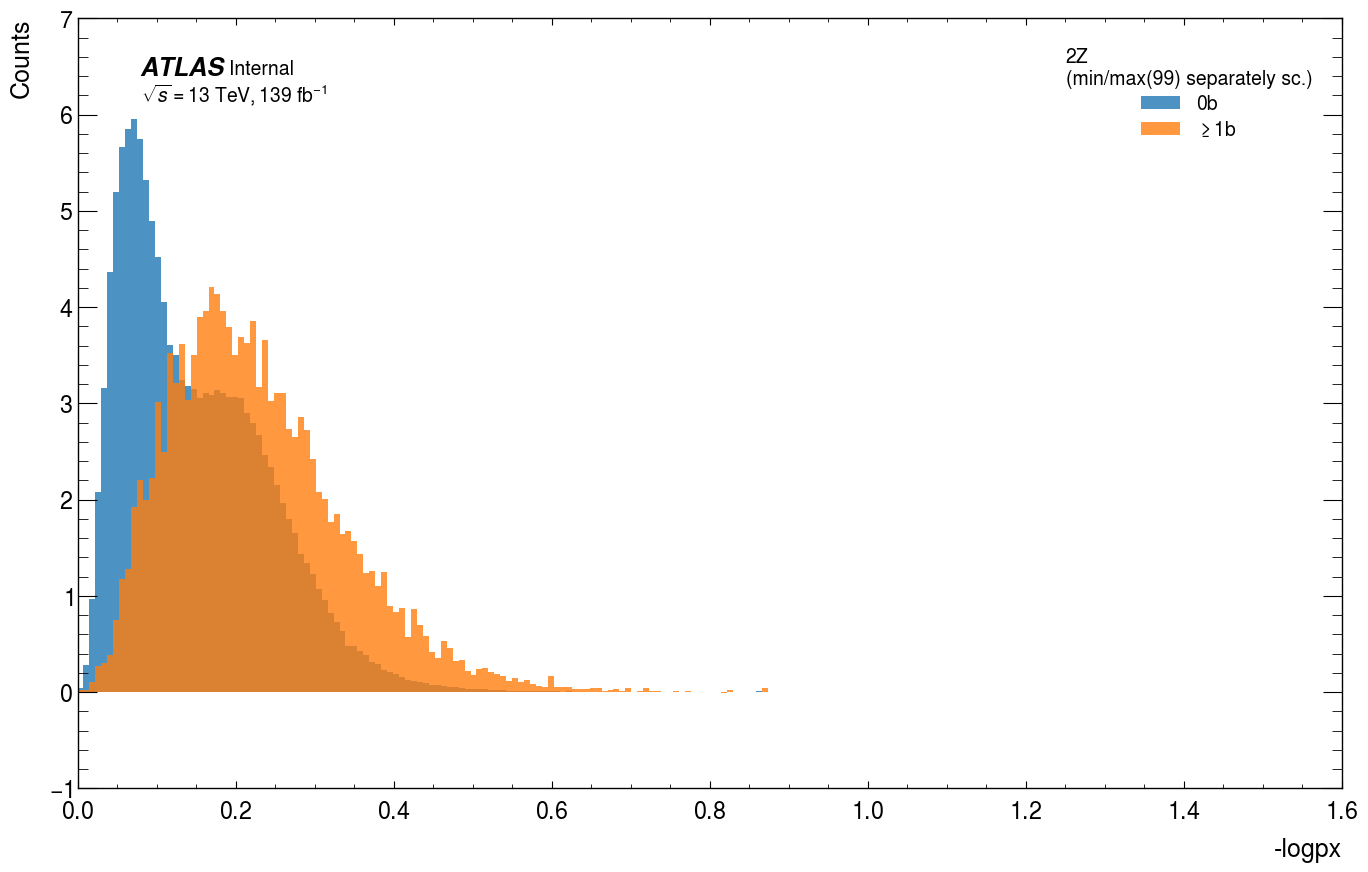

In [34]:
title = f"{r_name}\n(min/max(99) separately sc.)"

bins = np.linspace(0,1.5,200)
hist = np.histogram(scaled_0b, weights=dataset['all_weights'], bins=bins, density=True)

hist2 = np.histogram(scaled_1b, weights=dataset_1b['all_weights'], bins=bins,density=True)

fig, ax = plt.subplots(figsize=figsize)
hep.histplot(hist,histtype="fill",
    alpha=alpha,
    density=density,
    label='0b',
    ax=ax)

hep.histplot(hist2,histtype="fill",
    alpha=alpha,
    density=density,
    label=r'$\geq$1b',
    ax=ax)


hep.atlas.label(" Internal", data=True, lumi=139)
ax.legend(title=title, loc='upper right')
ax.set_xlabel('-logpx', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
ax.tick_params(axis='x', which='major', pad=8.5)

save_name = False
if save_name:
    #plt.savefig(os.path.join(save_dir, f"{var_choice}.png"))
    #plt.savefig(os.path.join(save_dir, f"{var_choice}.pdf"))
    plt.savefig(save_name+".png")
    plt.savefig(save_name+".pdf")

plt.show()
plt.close()